In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [30]:
df = pd.read_csv('Debit_Full', index_col = 0)

Ideas I would like to implement: <br> 
1) First find how many transactions I have had per day (if possible per week) <br>
2) Find total cost per day(if possible per week) <br>
3) Do a separate graph of total income along with total cost by day ( week or month) <br>
4) Find how much I pay for groceries, restaurants, clothing, miscillaneous <br>


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df['T_PerDay'] = df.groupby('Date')['Purchase'].transform('sum')
df['Month_Year'] = df['Date'].dt.to_period('M')

In [32]:
df_dategroup = df.groupby('Date')[['Purchase']].sum()

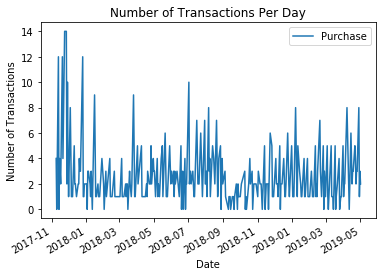

In [33]:
df_dategroup.plot()
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Day')
plt.show()

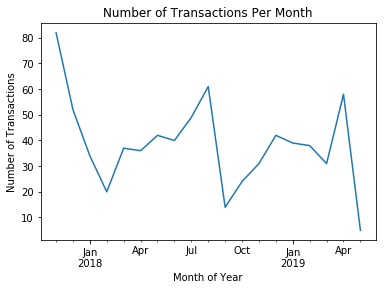

In [34]:
df_mygp = df.groupby('Month_Year')['Purchase'].sum()
df_mygp.plot()
plt.title('Number of Transactions Per Month')
plt.xlabel('Month of Year')
plt.ylabel('Number of Transactions')
plt.show()


In [35]:
#Here I will create deposit and withdrawal
df['Shopping_Cost'] = (df['Purchase'] * df['Cost']).abs()
def deposit(c):
    if c['Cost'] > 0 & c['Purchase'] == 0:
        return c['Cost']
    else:
        return 0.00
df['Deposit'] = df.apply(deposit, axis = 1)

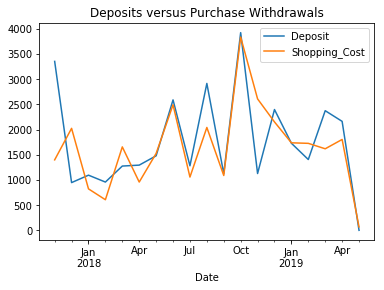

In [44]:
dep_sum = df.groupby('Month_Year')['Deposit'].sum()
cost_sum = df.groupby('Month_Year')['Shopping_Cost'].sum()
dep_sum.plot(legend=True)
cost_sum.plot(legend=True)
plt.title('Deposits versus Purchase Withdrawals')
plt.xlabel('Date')
plt.show()
